In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from voigt_fit_lib import *

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
nodes_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new_nodes.fits')
ids_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new_identifications.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
nodes_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new_nodes.fits')
ids_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new_identifications.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
nodes_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new_nodes.fits')
ids_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new_identifications.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [6]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis]
nodes_fits_list = [nodes_fits_fuv, nodes_fits_nuv, nodes_fits_stis]
ids_fits_list = [ids_fits_fuv, ids_fits_nuv, ids_fits_stis]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis]

Load in the ions table for atomic data

In [7]:
atomic_data_table = np.loadtxt('/Users/thepoetoftwilight/Documents/CUBS/pabs0/data/linelists/atom.dat', dtype=str)

Get OIV554 in COS FUV

In [8]:
oiv_554_fuv = ion_transition('OIV554', 121, 'FUV')

In [9]:
oiv_554_fuv.grab_ion_transition_info(ids_fits_list, atomic_data_table)

In [10]:
oiv_554_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-200,200])

In [11]:
oiv_554_fuv.cont_norm_flux(nodes_fits_list, renorm=True, v_abs_range=[-100,100], degree=1)

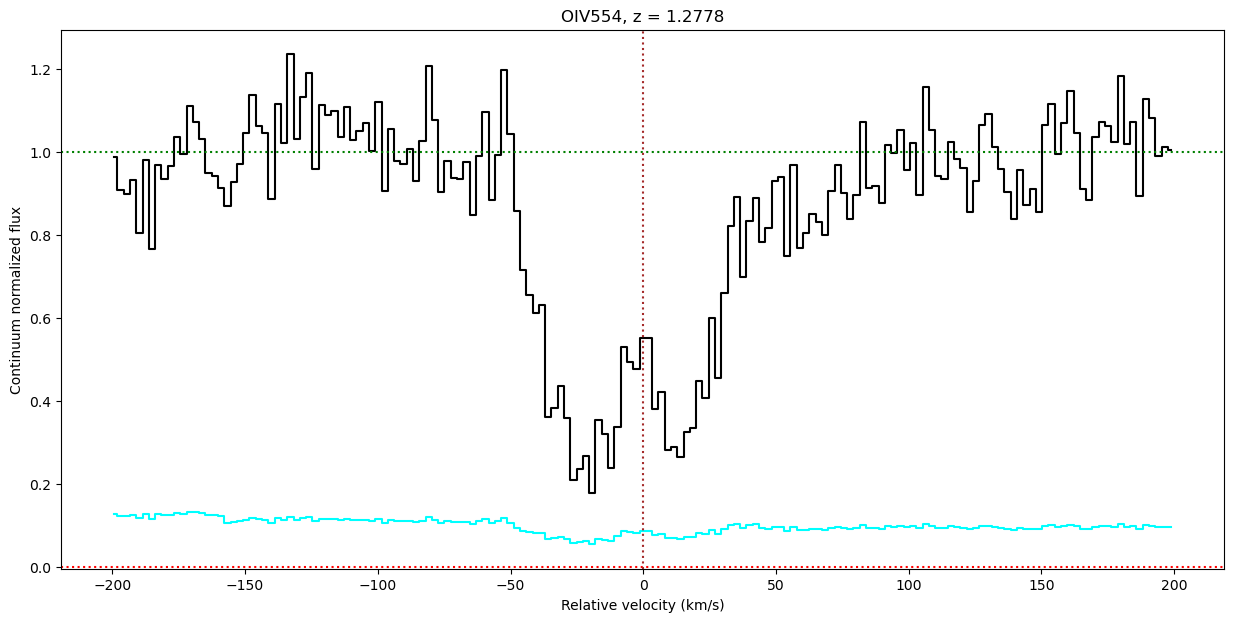

In [12]:
fig, ax = plt.subplots(1, figsize=(15,7))

oiv_554_fuv.plot_ion_transition_spec(ax)

In [13]:
oiv_554_fuv.grab_ion_transition_lsf(lsf_fits_list)

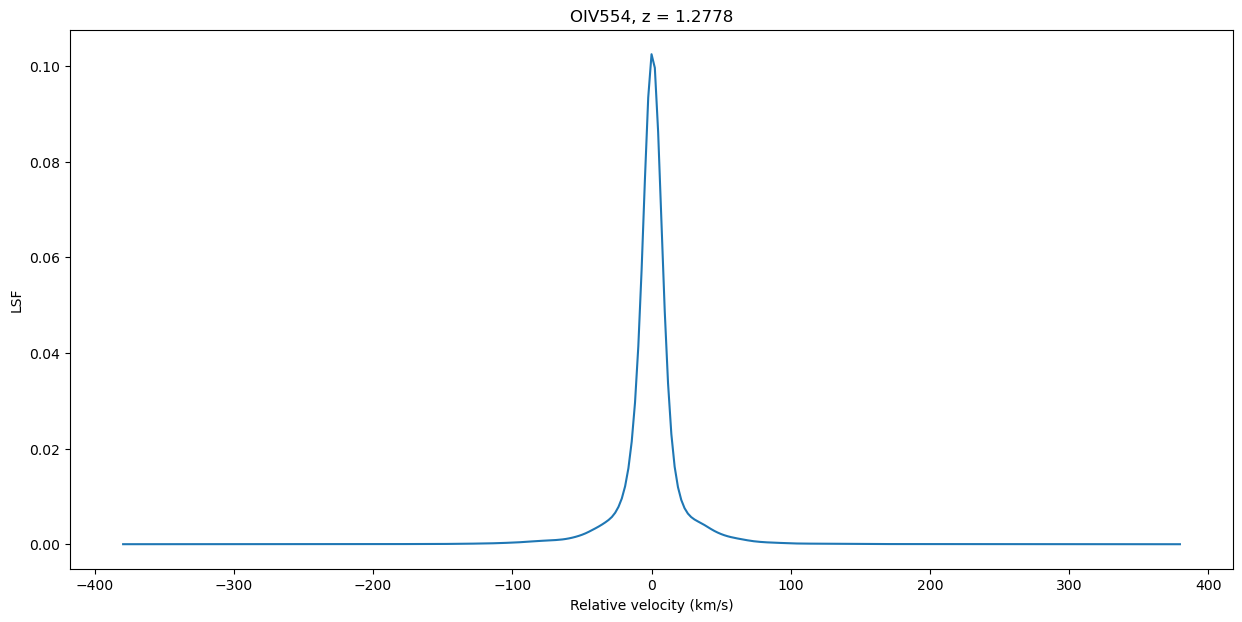

In [14]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_554_fuv.plot_ion_transition_lsf(ax)

In [15]:
oiv_554_fuv.init_multi_voigt(init_values = np.array([[14.4, 7, -20.5], 
                                                     [14.2, 7, 17]]), 
                             lsf_convolve = True)

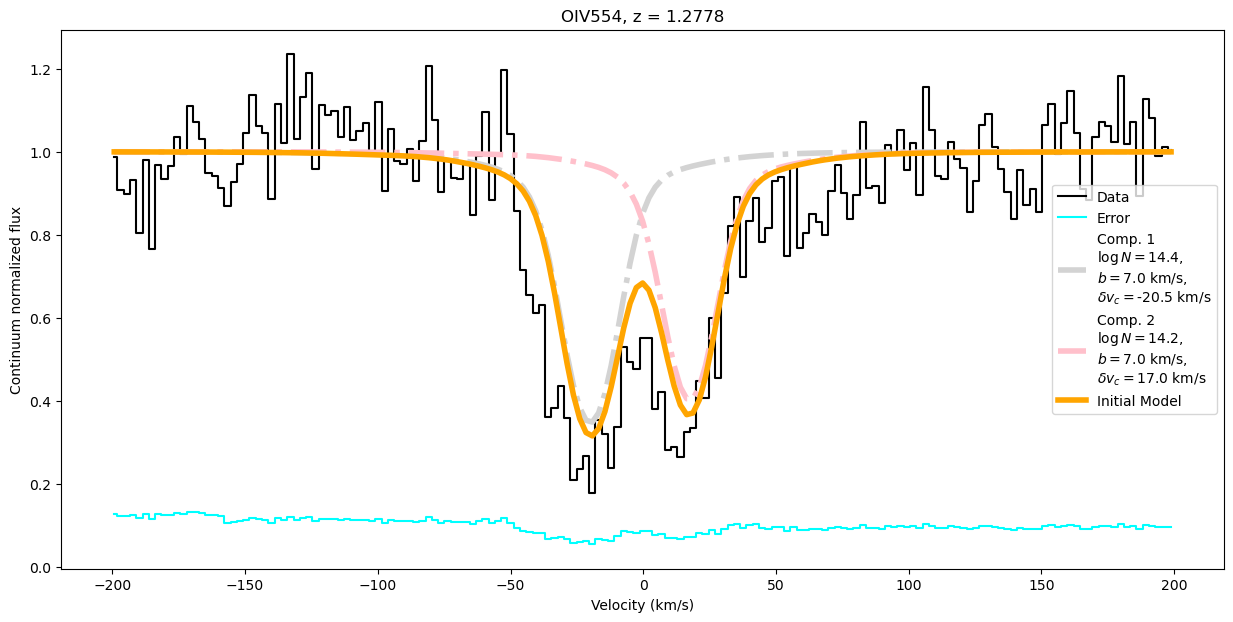

In [16]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_554_fuv.plot_init_profile(ax, legend=True)

In [17]:
oiv_554_fuv.fit_multi_voigt()

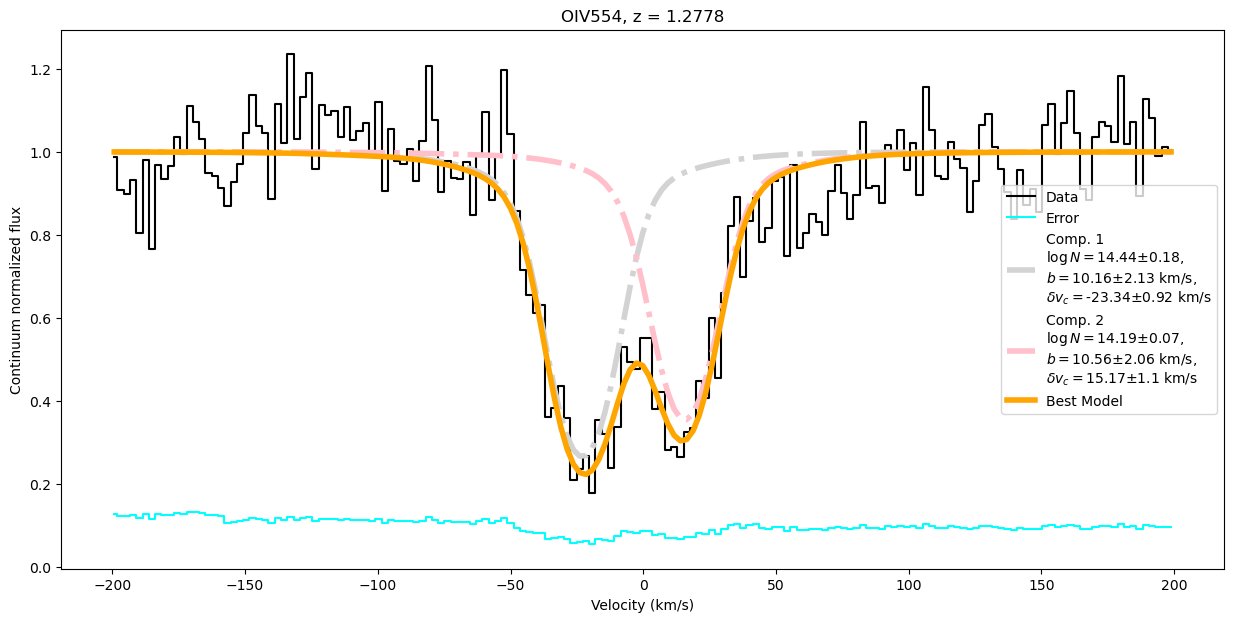

In [18]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_554_fuv.plot_best_profile(ax, legend=True)

In [19]:
oiv_554_fuv.result

In [24]:
np.concatenate((np.array([[1,2,3],[4,5,6]]), np.array([[1,2,3]])))

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3]])